# Lecture 1 - Momentum Trading

We will be using the python library yfinance to get all of our data, it has its limitations - such as incorrect and infrequent data, but for our experimentation on daily price it should work just fine

Load in necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px

Getting daily data for the stocks we are interested in

In [2]:
# Ticker list to download, today only working with one, SPY, which tracks the SandP 500
tickers = 'SPY'

# Download data from Yahoo-Finance
raw_data = yf.download(
    tickers = tickers,
    start="2021-01-01", # From what point do we want to start getting stock data
    end="2025-01-1", # From what point do we want to stop getting stock data
    interval = "1d", # The sample rate of the data one stock data every day
    ignore_tz=True,
    auto_adjust=True, # Adjust all fields by splits and dividends
)

#picking only close prices
raw_data = raw_data['Close']
raw_data.head()

[*********************100%***********************]  1 of 1 completed


Ticker,SPY
Date,
2021-01-04,345.273956
2021-01-05,347.652008
2021-01-06,349.730438
2021-01-07,354.926605
2021-01-08,356.948883


In [3]:
#re-naming columns
SPY_data = raw_data[[tickers]].copy()
SPY_data.columns = ['close']
SPY_data

,close
Date,
2021-01-04,345.273956
2021-01-05,347.652008
2021-01-06,349.730438
2021-01-07,354.926605
2021-01-08,356.948883
...,...
2024-12-24,596.076904
2024-12-26,596.116699
2024-12-27,589.841614


#### Task 1: Create slow and fast simple moving average columns of 50 and 10 days resepctively, then remove any nans

In [4]:
df = SPY_data.copy()
df['sma_slow'] = df['close'].rolling(window=50).mean()
df['sma_fast'] = df['close'].rolling(window=10).mean()
df.dropna(inplace=True)
df

,close,sma_slow,sma_fast
Date,,,
2021-03-16,370.664673,359.585076,363.271219
2021-03-17,371.928558,360.118168,364.754211
2021-03-18,366.517151,360.495471,366.137964
2021-03-19,365.838989,360.817642,366.805093
2021-03-22,368.760223,361.094315,367.943164
...,...,...,...
2024-12-24,596.076904,584.993623,592.063446
2024-12-26,596.116699,585.459636,591.658765
2024-12-27,589.841614,585.750355,590.935822


Q: There should only be 50 days dropped, but yet there are more than 50 days from the first of january to the 16th of March, why is this the case?

#### TASK 2: Plot slow and fast moving averages on same axis, and then close, slow and fast moving averages all on one axis

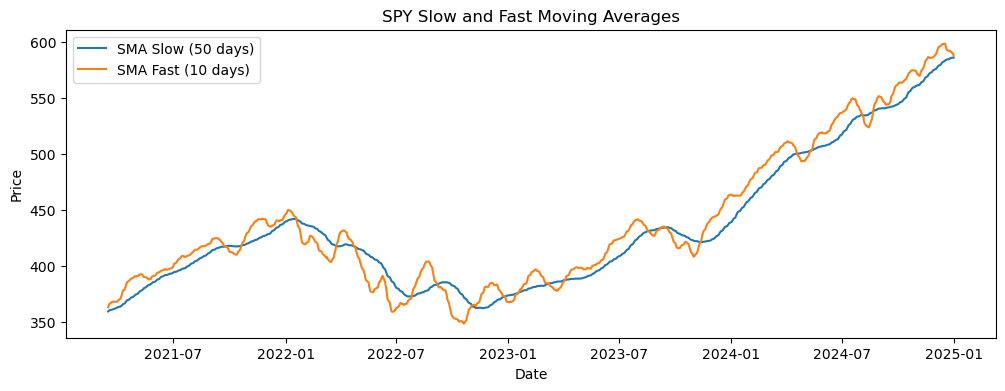

In [5]:
# Plot slow and fast moving averages
plt.figure(figsize=(12,4))
plt.plot(df.index, df['sma_slow'], label='SMA Slow (50 days)')
plt.plot(df.index, df['sma_fast'], label='SMA Fast (10 days)')
plt.title('SPY Slow and Fast Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

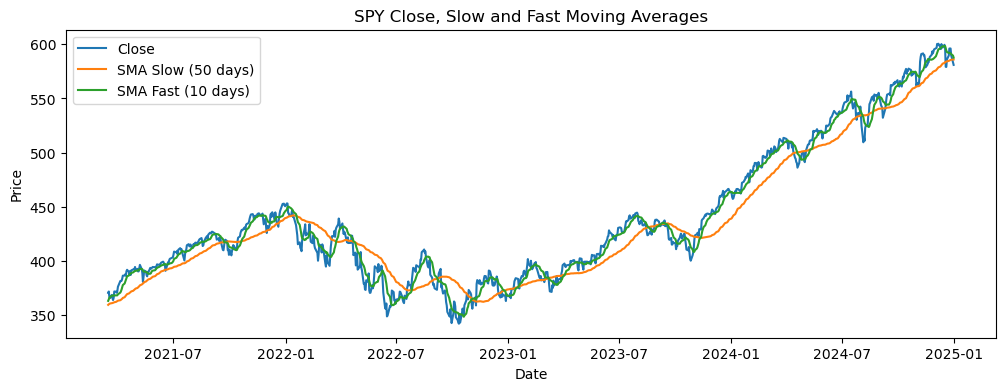

In [6]:
# Plot close, slow and fast moving averages
plt.figure(figsize=(12,4))
plt.plot(df.index, df['close'], label='Close')
plt.plot(df.index, df['sma_slow'], label='SMA Slow (50 days)')
plt.plot(df.index, df['sma_fast'], label='SMA Fast (10 days)')
plt.title('SPY Close, Slow and Fast Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### TASK 3: Get the signal from your moving averages, i.e. when slow below fast buy, and vice versa for fast below slow. Assign 1 to buys and -1 to sells, creating a new column signals in your dataframe, then plot this for a sense check.

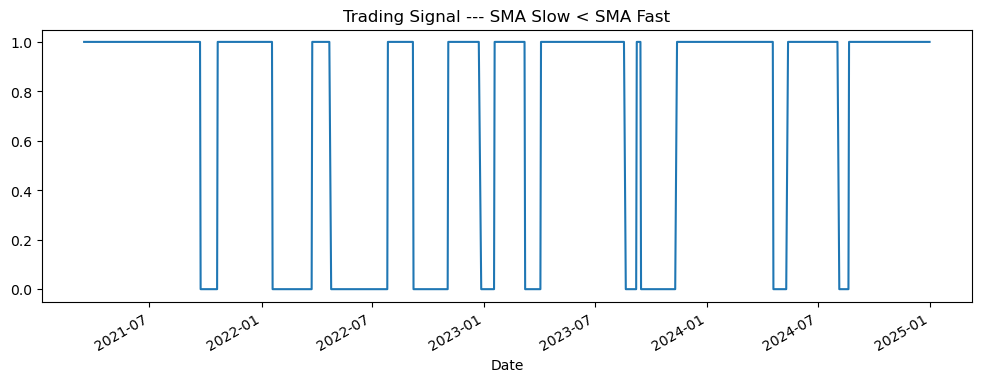

In [7]:
df['signal'] = df.apply(lambda x: int(x.sma_slow<x.sma_fast), axis=1)
df['signal'].plot(figsize=(12,4), title="Trading Signal --- SMA Slow < SMA Fast");

#### Task 4: Shift signal the values forward 1 day, in real life you can't trade in the past! Again make sure to drop any NA's

In [8]:
df['signal'] = df['signal'].shift(1)
df.dropna(inplace=True)
df

,close,sma_slow,sma_fast,signal
Date,,,,
2021-03-17,371.928558,360.118168,364.754211,1.0
2021-03-18,366.517151,360.495471,366.137964,1.0
2021-03-19,365.838989,360.817642,366.805093,1.0
2021-03-22,368.760223,361.094315,367.943164,1.0
2021-03-23,365.857727,361.272491,368.280740,1.0
...,...,...,...,...
2024-12-24,596.076904,584.993623,592.063446,1.0
2024-12-26,596.116699,585.459636,591.658765,1.0
2024-12-27,589.841614,585.750355,590.935822,1.0


#### TASK 5: Get the daily relative returns for the strategy returns of your strategy, again store as another column in the dataframe

In [9]:
# Calculate daily returns for the strategy
df['return'] = df['signal'] * df['close'].pct_change()
df.dropna(inplace=True)
df

,close,sma_slow,sma_fast,signal,return
Date,,,,,
2021-03-18,366.517151,360.495471,366.137964,1.0,-0.014550
2021-03-19,365.838989,360.817642,366.805093,1.0,-0.001850
2021-03-22,368.760223,361.094315,367.943164,1.0,0.007985
2021-03-23,365.857727,361.272491,368.280740,1.0,-0.007871
2021-03-24,363.997955,361.461597,368.206711,1.0,-0.005083
...,...,...,...,...,...
2024-12-24,596.076904,584.993623,592.063446,1.0,0.011115
2024-12-26,596.116699,585.459636,591.658765,1.0,0.000067
2024-12-27,589.841614,585.750355,590.935822,1.0,-0.010527


### Now for Backtesting

#### TASK 6: Now plot the returns of the strategy, against the risk free return (buy and hold) if we invested $100 in each to start

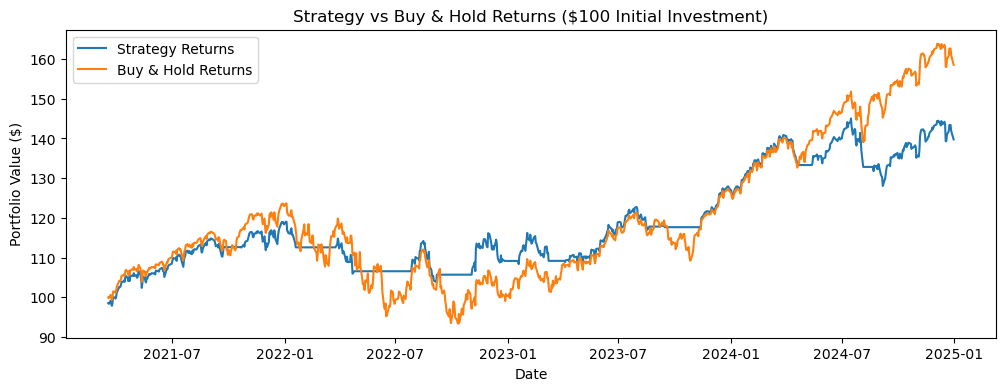

In [10]:
# Calculate cumulative returns for strategy and buy & hold
initial_investment = 100
strategy_cum = initial_investment * (1 + df['return']).cumprod()
buy_hold_cum = initial_investment * (df['close'] / df['close'].iloc[0])

plt.figure(figsize=(12,4))
plt.plot(df.index, strategy_cum, label='Strategy Returns')
plt.plot(df.index, buy_hold_cum, label='Buy & Hold Returns')
plt.title('Strategy vs Buy & Hold Returns ($100 Initial Investment)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

At this point you should expect to see the strategy returns to be lower than just buying/holding. Maybe this has something to do with the lenghts of our fast and slow moving averages...

#### Task 7: Find the optimal slow + fast SMAs, between 30-300 and 5-50 days respectively, checking every 5th day, i.e. check 30 + 5, 35 + 5, 30 + 10 etc.

#### Optimise with respect to sharpe ratio, taking buy+hold as your risk free rate (look up the formula for this if you need, it is straightforward and very commonly used as it balances returns and volatility) 

#### A bonus question: Why could Sharpe be a bad measure?

Note - for calculations of standard deviation/returns for Sharpe, you will need to annualise, meaning you need to scale the std by the root of 252 (number of days the market is open in a year), and raise your mean daily return to the power of 252

You will also need to reload the stock data

In [11]:
# Define ranges for slow and fast SMA windows
slow_windows = range(30, 301, 5)
fast_windows = range(5, 51, 5)

best_sharpe = -np.inf
best_slow = None
best_fast = None

# Annualisation factor
trading_days = 252

# Reload data for full range
data = SPY_data.copy()

results = []

for slow in slow_windows:
    for fast in fast_windows:
        if fast >= slow:
            continue  # fast must be less than slow
        df_opt = data.copy()
        df_opt['sma_slow'] = df_opt['close'].rolling(window=slow).mean()
        df_opt['sma_fast'] = df_opt['close'].rolling(window=fast).mean()
        df_opt.dropna(inplace=True)
        df_opt['signal'] = (df_opt['sma_slow'] < df_opt['sma_fast']).astype(int)
        df_opt['signal'] = df_opt['signal'].shift(1)
        df_opt.dropna(inplace=True)
        df_opt['return'] = df_opt['signal'] * df_opt['close'].pct_change()
        df_opt.dropna(inplace=True)
        
        # Strategy stats
        mean_return = df_opt['return'].mean()
        std_return = df_opt['return'].std()
        
        # Annualise
        annual_return = (1 + mean_return) ** trading_days - 1
        annual_std = std_return * np.sqrt(trading_days)
        
        # Buy & hold stats (risk free)
        bh_return = df_opt['close'].pct_change().mean()
        bh_annual_return = (1 + bh_return) ** trading_days - 1
        
        # Sharpe ratio
        sharpe = (annual_return - bh_annual_return) / annual_std if annual_std != 0 else np.nan
        results.append((slow, fast, sharpe))
        
        if sharpe > best_sharpe:
            best_sharpe = sharpe
            best_slow = slow
            best_fast = fast

# Store results as DataFrame for inspection
opt_results = pd.DataFrame(results, columns=['slow', 'fast', 'sharpe'])
print(f"Best Sharpe Ratio: {best_sharpe:.4f} with slow={best_slow}, fast={best_fast}")
opt_results.sort_values('sharpe', ascending=False).head()

Best Sharpe Ratio: 0.3069 with slow=230, fast=50


,slow,fast,sharpe
394,230,50,0.306912
404,235,50,0.299965
282,175,40,0.293764
292,180,40,0.289340
281,175,35,0.283917


#### TASK 8: Plot these optimal windows against a buy and hold strategy

Remember you will need to reload the data again

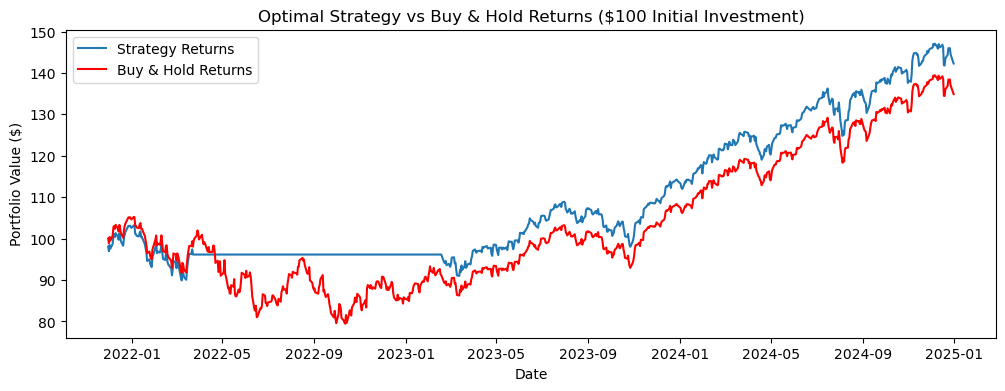

In [21]:
# Optimal
df = SPY_data.copy()
df['sma_slow'] = df['close'].rolling(window=best_slow).mean()
df['sma_fast'] = df['close'].rolling(window=best_fast).mean()
df['signal'] = df.apply(lambda x: int(x.sma_slow<x.sma_fast), axis=1)
df['return'] = df['signal'] * df['close'].pct_change()
df.dropna(inplace=True)

# Calculate cumulative returns for strategy and buy & hold
initial_investment = 100
strategy_cum = initial_investment * (1 + df['return']).cumprod()
buy_hold_cum = initial_investment * (df['close'] / df['close'].iloc[0])

plt.figure(figsize=(12,4))
plt.plot(df.index, strategy_cum, label='Strategy Returns')
plt.plot(df.index, buy_hold_cum, label='Buy & Hold Returns', color='red')
plt.title('Optimal Strategy vs Buy & Hold Returns ($100 Initial Investment)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

At this point you should see you have a strategy which earns more money than a simply by and hold, congratulations on your first alpha!

##### Extension: 

Repeat the backtest/optimisation for exponential moving averages and/or a proper MACD strategy

Harder - Can you think of a better way to optimise than just testing every single pair?

In [15]:
df = SPY_data.copy()

# Windows
fast_window = 10
slow_window = 50
macd_window = 9

# Simple Moving Average
df['sma_slow'] = df['close'].rolling(window=slow_window).mean()
df['sma_fast'] = df['close'].rolling(window=fast_window ).mean()
df['sma_signal'] = df.apply(lambda x: int(x.sma_slow<x.sma_fast), axis=1)

# Exponential Moving Average
df['ema_slow'] = df['close'].ewm(span=slow_window, min_periods=slow_window, adjust=False).mean()
df['ema_fast'] = df['close'].ewm(span=fast_window, min_periods=fast_window, adjust=False).mean()
df['ema_signal'] = df.apply(lambda x: int(x.ema_slow<x.ema_fast), axis=1)

# MACD (Moving Average Convergence Divergence)
df['macd_line'] = (df['ema_fast'] - df['ema_slow'])
df['macd_signal_line'] = df['macd_line'].ewm(span=macd_window, min_periods=macd_window, adjust=False).mean()
df['macd_signal'] = df.apply(lambda x: int(x.macd_line>x.macd_signal_line), axis=1)

# Calculate returns
for c in df.columns:
    if c.endswith('_signal'):
        df[f"{c[:-7]}_return"] = df[c] * df['close'].pct_change()

df.dropna(inplace=True)
df

,close,sma_slow,sma_fast,sma_signal,ema_slow,ema_fast,ema_signal,macd_line,macd_signal_line,macd_signal,sma_return,ema_return,macd_return
Date,,,,,,,,,,,,,
2021-03-26,371.944489,362.017596,368.268817,1,361.762286,367.308947,1,5.546661,5.762630,0,0.016115,0.016115,0.000000
2021-03-29,371.756592,362.366182,368.331195,1,362.154220,368.117609,1,5.963390,5.802782,1,-0.000505,-0.000505,-0.000505
2021-03-30,370.770294,362.746721,368.341757,1,362.492105,368.599916,1,6.107811,5.863788,1,-0.002653,-0.002653,-0.002653
2021-03-31,372.273102,363.102077,368.376212,1,362.875673,369.267768,1,6.392094,5.969449,1,0.004053,0.004053,0.004053
2021-04-01,376.293365,363.439721,369.353833,1,363.401857,370.545149,1,7.143292,6.204218,1,0.010799,0.010799,0.010799
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,596.076904,584.993623,592.063446,1,584.251024,591.215468,1,6.964444,9.632860,0,0.011115,0.011115,0.000000
2024-12-26,596.116699,585.459636,591.658765,1,584.716345,592.106601,1,7.390256,9.184339,0,0.000067,0.000067,0.000000
2024-12-27,589.841614,585.750355,590.935822,1,584.917336,591.694785,1,6.777449,8.702961,0,-0.010527,-0.010527,-0.000000


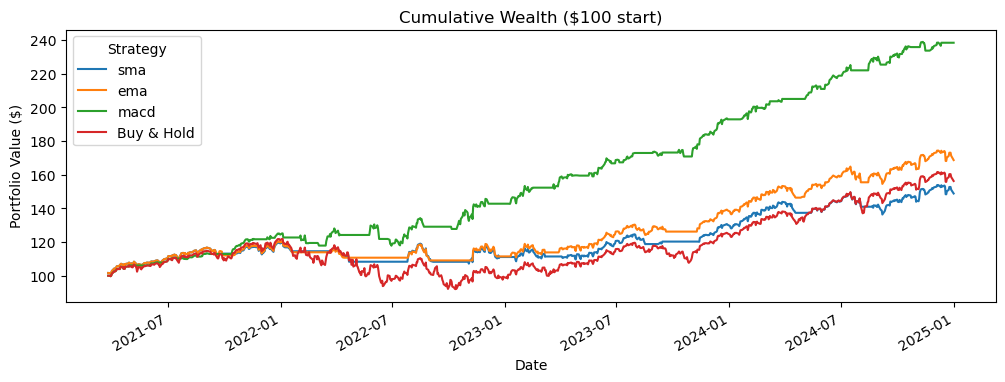

In [20]:
# 1) Pick all strategy return columns (assumed decimal daily returns)
ret_cols = df.filter(regex=r'_return$')

# 2) Turn into $100 cumulative wealth curves (fill NaNs with 0 to avoid breaks)
cum_strats = (1 + ret_cols.fillna(0)).cumprod() * 100

# Optional: nicer legend labels by stripping the suffix
cum_strats.columns = [c[:-7] for c in cum_strats.columns]  # remove "_return"

# 3) Buy & Hold curve from close
buy_hold = 100 * (df['close'] / df['close'].iloc[0])

# 4) Plot
plt.figure(figsize=(12,4))
cum_strats.plot(ax=plt.gca())
buy_hold.plot(ax=plt.gca(), label='Buy & Hold')
plt.title('Cumulative Wealth ($100 start)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend(title='Strategy')
plt.show()